# Proyecto: Prediccion de diabetes

**Integrantes:**
-  Hilter Piero Lanche Cerron
-  Jorge Andres Chavarri Centeno
-  Joel Joseph Rivera Matias

# 📌 Fase 1. Business Understanding

## 🎯 1. Objective

El objetivo de este proyecto es desarrollar un **modelo predictivo** que permita determinar la probabilidad de que una persona haya sido diagnosticada con **diabetes o azúcar alta** (variable QS109) a partir de características sociodemográficas, clínicas y de estilo de vida, específicamente:  

- **Edad de la persona** (QS23)
- **Sexo** (QS14)
- **Mediciones antropométricas**: peso (QS900), talla (QS901), perímetro abdominal (QS907).
- **Presión arterial**: sistólica y diastólica (QS903S, QS903D, QS905S, QS905D), y diagnóstico de hipertensión (QS102).
- **Estilo de vida**: consumo de tabaco (QS200–QS205) y alcohol (QS206–QS210).
- **Dieta**: frecuencia de consumo de frutas, verduras y jugos (QS213C–QS220CV).

# 📌 Fase 2. Data Understanding

## 📥 2. Data collection

In [21]:
import pandas as pd
import numpy as np


data = pd.read_csv("datamineria.csv", 
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=';',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como índice

In [23]:
# Resumen general
data.info()
print('data.columns:',data.columns)
print('data.shape:',data.shape)
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34018 entries, 0 to 34017
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   QSSEXO  31487 non-null  float64
 1   QS23    31484 non-null  float64
 2   QS102   31481 non-null  float64
 3   QS109   31481 non-null  float64
 4   QS202   2896 non-null   float64
 5   QS203C  356 non-null    float64
 6   QS205C  356 non-null    float64
 7   QS206   31467 non-null  float64
 8   QS207C  28525 non-null  float64
 9   QS208   28886 non-null  float64
 10  QS209   21129 non-null  float64
 11  QS210   21129 non-null  float64
 12  QS211C  10312 non-null  float64
 13  QS212A  10312 non-null  float64
 14  QS212G  10312 non-null  float64
 15  QS213C  28434 non-null  float64
 16  QS218C  5415 non-null   float64
 17  QS219C  22778 non-null  float64
 18  QS200   31467 non-null  float64
 19  QS201   4929 non-null   float64
 20  QS304   8186 non-null   float64
 21  QS500   31457 non-null  float64
 22

,QSSEXO,QS23,QS102,QS109,QS202,QS203C,QS205C,QS206,QS207C,QS208,...,QS201,QS304,QS500,QS900,QS901,QS903S,QS903D,QS905S,QS905D,QS907
0,2.0,38.0,2.0,2.0,NaN,NaN,NaN,1.0,17.0,2.0,...,NaN,NaN,1.0,70.4,152.5,126.0,93.0,123.0,95.0,98.9
1,2.0,17.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,2.0,49.8,160.2,86.0,68.0,90.0,65.0,68.4
2,2.0,65.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,2.0,2.0,49.7,136.2,123.0,79.0,121.0,74.0,86.3
3,1.0,33.0,2.0,2.0,2.0,NaN,NaN,1.0,17.0,1.0,...,1.0,NaN,2.0,76.0,158.2,123.0,89.0,118.0,87.0,100.4
4,1.0,30.0,2.0,2.0,NaN,NaN,NaN,1.0,21.0,2.0,...,NaN,NaN,2.0,66.0,159.4,107.0,70.0,119.0,72.0,87.2
5,2.0,32.0,2.0,2.0,NaN,NaN,NaN,1.0,18.0,1.0,...,NaN,NaN,2.0,72.9,157.0,128.0,88.0,126.0,86.0,91.7
6,2.0,34.0,2.0,2.0,NaN,NaN,NaN,1.0,26.0,2.0,...,NaN,NaN,2.0,57.3,153.3,90.0,56.0,96.0,65.0,80.2
7,2.0,18.0,2.0,2.0,NaN,NaN,NaN,1.0,17.0,1.0,...,NaN,NaN,2.0,67.6,151.5,105.0,75.0,108.0,74.0,93.2
8,1.0,45.0,2.0,2.0,NaN,NaN,NaN,1.0,19.0,1.0,...,NaN,NaN,2.0,85.7,171.6,133.0,88.0,134.0,87.0,101.1
9,2.0,33.0,2.0,2.0,NaN,NaN,NaN,1.0,24.0,1.0,...,NaN,NaN,2.0,81.2,158.3,109.0,75.0,108.0,75.0,108.1


## 📊 3. Descriptive analysis

### 3.1 Análisis descriptivo

In [24]:
#Resumen estadístico de todas las variables (describe()).
data.describe(include="all").T # incluye categóricas y numéricas

,count,mean,std,min,25%,50%,75%,max
QSSEXO,31487.0,1.579255,0.493687,1.0,1.0,2.0,2.0,2.0
QS23,31484.0,39.886387,16.973088,15.0,27.0,36.0,50.0,97.0
QS102,31481.0,1.917220,0.320334,1.0,2.0,2.0,2.0,8.0
QS109,31481.0,1.969092,0.254248,1.0,2.0,2.0,2.0,8.0
QS202,2896.0,1.876727,0.328808,1.0,2.0,2.0,2.0,2.0
QS203C,356.0,25.671348,11.532263,10.0,18.0,21.0,30.0,78.0
QS205C,356.0,4.303371,4.003251,1.0,2.0,3.0,5.0,20.0
QS206,31467.0,1.082785,0.285085,1.0,1.0,1.0,1.0,8.0
QS207C,28525.0,19.123050,4.876925,5.0,16.0,18.0,20.0,68.0
QS208,28886.0,1.269785,0.453577,1.0,1.0,1.0,2.0,8.0


In [25]:
# Separar los datos segú sus Tipos de variables (numéricas, categóricas). fechas se considera como cat aunque también puedes separr
numeric_data = data.select_dtypes(include=[np.number])
categor_data = data.select_dtypes(exclude=[np.number])
print ("Hay {} variables númericas y {} categóricas en la data".format(numeric_data.shape[1],categor_data.shape[1]))

Hay 29 variables númericas y 0 categóricas en la data


In [26]:
# Puedes ver la Distribución de variables numéricas
numeric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
QSSEXO,31487.0,1.579255,0.493687,1.0,1.0,2.0,2.0,2.0
QS23,31484.0,39.886387,16.973088,15.0,27.0,36.0,50.0,97.0
QS102,31481.0,1.917220,0.320334,1.0,2.0,2.0,2.0,8.0
QS109,31481.0,1.969092,0.254248,1.0,2.0,2.0,2.0,8.0
QS202,2896.0,1.876727,0.328808,1.0,2.0,2.0,2.0,2.0
QS203C,356.0,25.671348,11.532263,10.0,18.0,21.0,30.0,78.0
QS205C,356.0,4.303371,4.003251,1.0,2.0,3.0,5.0,20.0
QS206,31467.0,1.082785,0.285085,1.0,1.0,1.0,1.0,8.0
QS207C,28525.0,19.123050,4.876925,5.0,16.0,18.0,20.0,68.0
QS208,28886.0,1.269785,0.453577,1.0,1.0,1.0,2.0,8.0


In [28]:
#Variables únicas en cada variable
#categor_data.describe(include="all").T

In [46]:
from IPython.display import Markdown, display

# Diccionario de etiquetas (Código → Descripción)
labels = {
    'QSSEXO': "SEXO",
    'QS23': "EDAD",
    'QS102': "Le diagnosticaron Hipertensión Arterial o Presión Alta",
    'QS202': "Fuma diariamente",
    'QS207C': "Edad que empezó a fumar diariamente",
    'QS209': "En los últimos 12 meses ha consumido alguna bebida alcohólica",
    'QS219C': "Días que comió ensalada de verduras",
    'QS900': "Peso (kg) - Personas de 15 años a más",
    'QS901': "Talla (cm) - Personas de 15 años a más",
    'QS907': "Perímetro abdominal (cm)",
    'QS905S': "Segunda medición presión arterial diastólica",
    'QS905D': "Segunda medición presión arterial sistólica"
}

# Conteo de valores únicos con etiqueta arriba
for col in labels.keys():
    display(Markdown(f"\n##### {col} → {labels[col]}"))
    print(data[col].value_counts())



# Conteo de la variable objetivo
display(Markdown("\n\n### QS109 → Le diagnosticaron diabetes"))
data["QS109"].value_counts()



##### QSSEXO → SEXO

QSSEXO
2.0    18239
1.0    13248
Name: count, dtype: int64



##### QS23 → EDAD

QS23
32.0    976
31.0    967
36.0    942
29.0    930
30.0    918
       ... 
94.0     12
96.0      9
97.0      9
93.0      6
95.0      4
Name: count, Length: 83, dtype: int64



##### QS102 → Le diagnosticaron Hipertensión Arterial o Presión Alta

QS102
2.0    28735
1.0     2726
8.0       20
Name: count, dtype: int64



##### QS202 → Fuma diariamente

QS202
2.0    2539
1.0     357
Name: count, dtype: int64



##### QS207C → Edad que empezó a fumar diariamente

QS207C
18.0    5432
20.0    4289
17.0    3281
15.0    2782
16.0    2544
19.0    1925
25.0    1289
14.0    1112
22.0    1093
21.0     714
23.0     623
30.0     616
24.0     460
13.0     412
12.0     343
28.0     263
26.0     188
27.0     170
35.0     150
10.0     127
40.0     125
11.0      72
32.0      63
29.0      55
8.0       46
33.0      45
50.0      38
38.0      38
45.0      33
34.0      20
9.0       19
36.0      19
48.0      17
37.0      12
42.0      11
31.0      10
60.0      10
39.0       9
55.0       8
7.0        8
43.0       7
46.0       7
41.0       5
49.0       5
44.0       4
63.0       3
6.0        3
51.0       3
58.0       3
59.0       2
64.0       2
47.0       2
54.0       2
68.0       1
52.0       1
62.0       1
57.0       1
53.0       1
5.0        1
Name: count, dtype: int64



##### QS209 → En los últimos 12 meses ha consumido alguna bebida alcohólica

QS209
2.0    17218
1.0     3892
8.0       19
Name: count, dtype: int64



##### QS219C → Días que comió ensalada de verduras

QS219C
2.0    5791
3.0    4801
1.0    4716
7.0    3850
4.0    2210
5.0    1097
6.0     313
Name: count, dtype: int64



##### QS900 → Peso (kg) - Personas de 15 años a más

QS900
999.9    408
63.4     127
70.0     113
61.7     113
61.6     111
        ... 
118.9      1
133.5      1
116.9      1
139.5      1
112.3      1
Name: count, Length: 915, dtype: int64



##### QS901 → Talla (cm) - Personas de 15 años a más

QS901
999.9    408
154.0    187
156.0    169
154.5    168
152.5    168
        ... 
130.6      1
185.5      1
180.3      1
182.3      1
183.0      1
Name: count, Length: 555, dtype: int64



##### QS907 → Perímetro abdominal (cm)

QS907
999.9    827
90.5     171
89.5     153
90.0     147
94.5     144
        ... 
140.2      1
60.9       1
132.3      1
148.0      1
119.3      1
Name: count, Length: 773, dtype: int64



##### QS905S → Segunda medición presión arterial diastólica

QS905S
110.0    875
105.0    847
108.0    843
115.0    837
107.0    837
        ... 
60.0       1
63.0       1
196.0      1
210.0      1
219.0      1
Name: count, Length: 146, dtype: int64



##### QS905D → Segunda medición presión arterial sistólica

QS905D
72.0     1329
70.0     1322
75.0     1249
71.0     1247
69.0     1230
         ... 
130.0       1
124.0       1
131.0       1
126.0       1
123.0       1
Name: count, Length: 95, dtype: int64




### QS109 → Le diagnosticaron diabetes

QS109
2.0    30326
1.0     1129
8.0       26
Name: count, dtype: int64

### 3.2 Análisis descriptivo (gráficos)

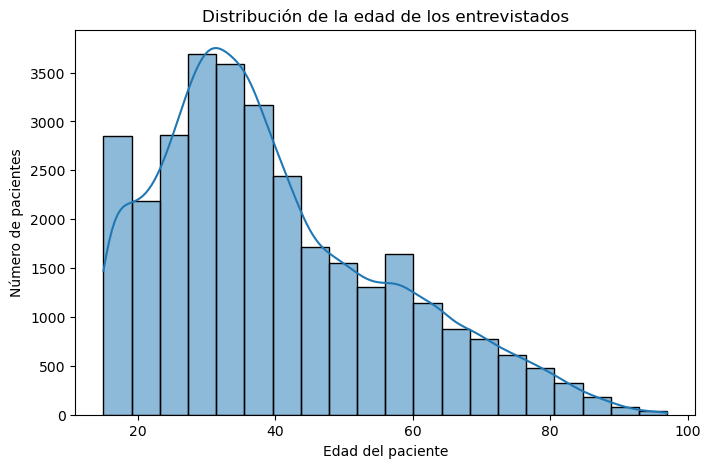

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la edad de los pacientes
plt.figure(figsize=(8,5))
sns.histplot(data['QS23'], bins=20, kde=True)
plt.title("Distribución de la edad de los entrevistados")
plt.xlabel("Edad del paciente")
plt.ylabel("Número de pacientes")
plt.show()

👉 El gráfico muestra que la mayoría de los entrevistados se concentra en edades jóvenes y adultas jóvenes, principalmente entre los 20 y 40 años, mientras que a partir de los 50 años la frecuencia comienza a disminuir de forma progresiva y en los 70 años o más los casos son poco representativos. Esto indica que la muestra está compuesta mayoritariamente por población en edad productiva, con menor proporción de adultos mayores.

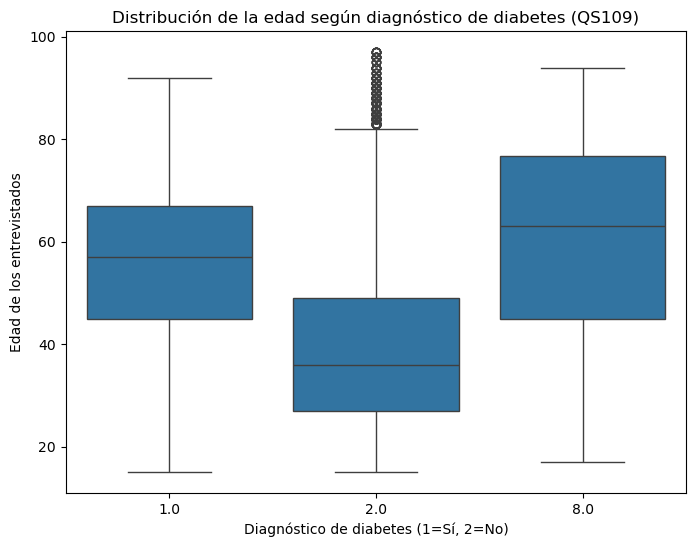

In [12]:
# Relación entre Edad y Diagnostico de Diabetes
plt.figure(figsize=(8,6))  # tamaño más compacto que con 18
sns.boxplot(x="QS109", y="QS23", data=data)  # QS109 = sí/no, QS23 = edad
plt.xlabel("Diagnóstico de diabetes (1=Sí, 2=No)")
plt.ylabel("Edad de los entrevistados")
plt.title("Distribución de la edad según diagnóstico de diabetes (QS109)")
plt.show()

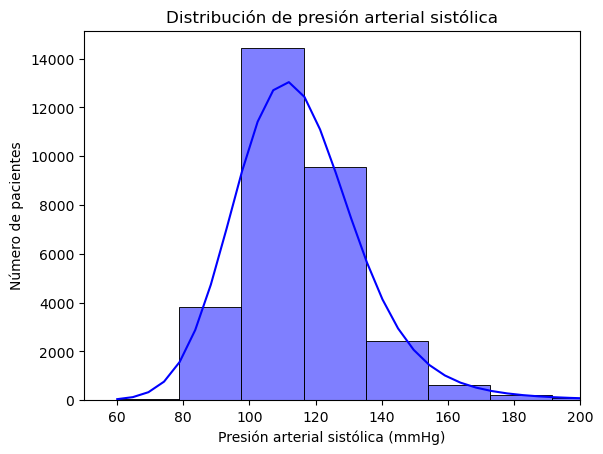

In [13]:
# Distribución de Presión Arterial Sistólica (QS905S)
sns.histplot(data['QS905S'], bins=50, kde=True, color="blue")
plt.xlim(50, 200) 
plt.xlabel("Presión arterial sistólica (mmHg)")
plt.ylabel("Número de pacientes")
plt.title("Distribución de presión arterial sistólica")
plt.show()

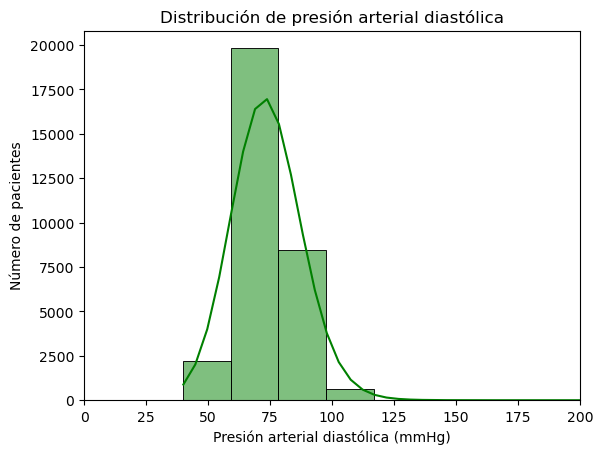

In [14]:
# Distribución de Presión Arterial Diastólica (QS905D)
sns.histplot(data['QS905D'], bins=50, kde=True, color="green")
plt.xlim(0, 200) 
plt.xlabel("Presión arterial diastólica (mmHg)")
plt.ylabel("Número de pacientes")
plt.title("Distribución de presión arterial diastólica")
plt.show()

### 3.3 Análisis exploratorio (con estadísticas): Correlaciones y cruces de variables

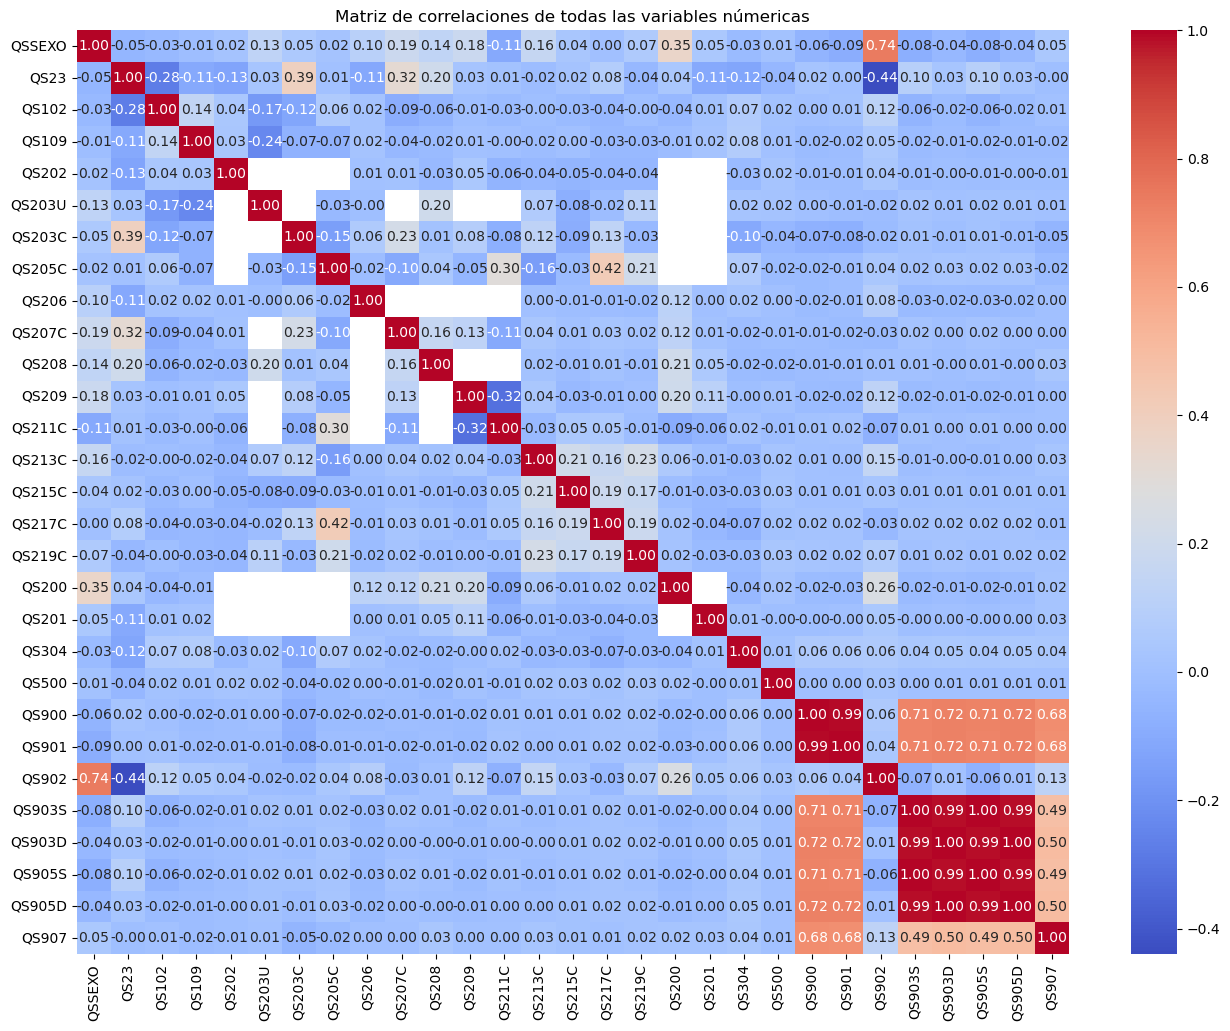

QSSEXO,1.0,2.0
QS109,,
1.0,37.732507,62.267493
2.0,42.240981,57.759019
8.0,38.461538,61.538462


In [15]:
# Correlaciones de todas las variables númericas
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones de todas las variables númericas")
plt.show()

# Cruce de variables categóricas con el objetivo
pd.crosstab(data['QS109'], data['QSSEXO'], normalize='index') * 100

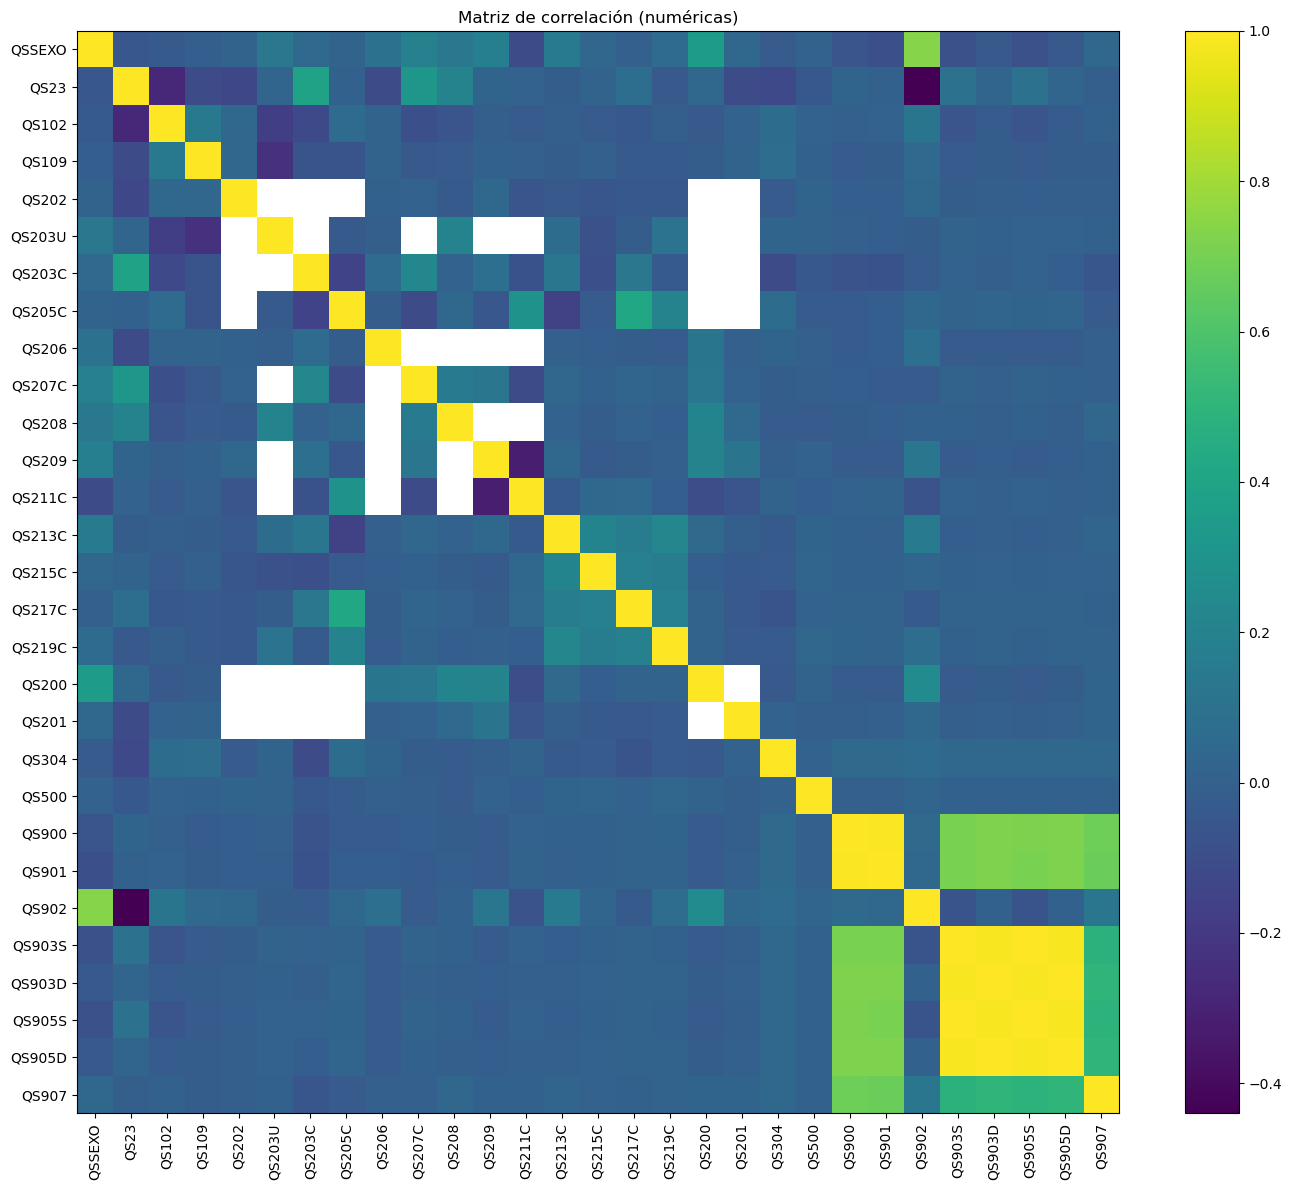

In [16]:
# Correlaciones numéricas (heatmap)
num_cols = data.select_dtypes(include=['int64','float64']).columns
corr = data[num_cols].corr()
plt.figure(figsize=(14,12))
im = plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.title('Matriz de correlación (numéricas)')
plt.colorbar(im)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()

### 3.4 Diagnóstico de calidad inicial

In [17]:
# Valores faltantes
print(data.isnull().sum())

QSSEXO     2531
QS23       2534
QS102      2537
QS109      2537
QS202     31122
QS203U    33661
QS203C    33662
QS205C    33662
QS206      2551
QS207C     5493
QS208      5132
QS209     12889
QS211C    23706
QS213C     5584
QS215C    20221
QS217C    28603
QS219C    11240
QS200      2551
QS201     29089
QS304     25832
QS500      2561
QS900      2569
QS901      2569
QS902      2569
QS903S     2567
QS903D     2567
QS905S     2567
QS905D     2567
QS907      2567
dtype: int64


In [18]:
# Posibles inconsistencias
print("Mínimo y máximo edad:", data['QS23'].min(), data['QS23'].max())
print("Peso mínimo y máximo:", data['QS900'].min(), data['QS900'].max())
print("Talla mínima y máxima:", data['QS901'].min(), data['QS901'].max())
print("Presión sistólica min/max:", data['QS905S'].min(), data['QS905S'].max())
print("Presión diastólica min/max:", data['QS905D'].min(), data['QS905D'].max())
print("Perímetro abdominal min/max:", data['QS907'].min(), data['QS907'].max())

Mínimo y máximo edad: 15.0 97.0
Peso mínimo y máximo: 24.5 999.9
Talla mínima y máxima: 119.0 999.9
Presión sistólica min/max: 60.0 999.0
Presión diastólica min/max: 40.0 999.0
Perímetro abdominal min/max: 55.0 999.9


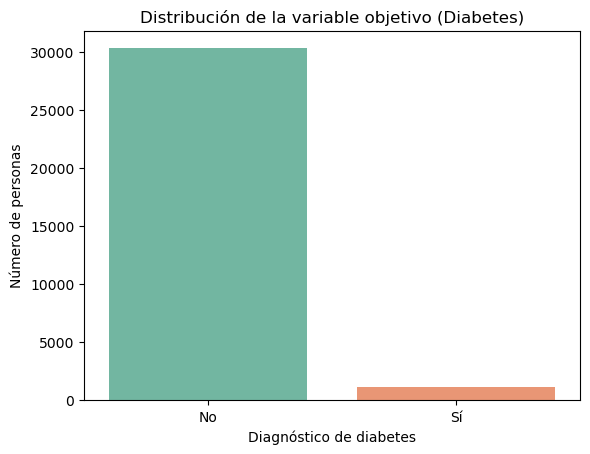

In [19]:
# Distribución de diabetes
data['DIABETES'] = data['QS109'].map({1: "Sí", 2: "No"})
sns.countplot(x='DIABETES', hue='DIABETES', data=data, palette='Set2', legend=False)
plt.title("Distribución de la variable objetivo (Diabetes)")
plt.xlabel("Diagnóstico de diabetes")
plt.ylabel("Número de personas")
plt.show()

El gráfico muestra la distribución de la variable objetivo diabetes (QS109) en la población encuestada: la gran mayoría de personas no reporta diagnóstico de diabetes (“No”), mientras que solo una fracción muy pequeña sí ha sido diagnosticada (“Sí”). Esto refleja un fuerte desbalance de clases, con muchos más casos negativos que positivos en la muestra.

In [20]:
#Valores faltantes: identificar y cuantificar (df.isnull().sum()).
na_counts = data.isna().sum().sort_values(ascending=False)
na_pct = (na_counts/len(data)*100).round(2)
quality_missing = pd.DataFrame({'missing': na_counts, 'missing_%': na_pct})
display(quality_missing)

,missing,missing_%
QS205C,33662,98.95
QS203C,33662,98.95
QS203U,33661,98.95
QS202,31122,91.49
QS201,29089,85.51
QS217C,28603,84.08
QS304,25832,75.94
QS211C,23706,69.69
QS215C,20221,59.44
QS209,12889,37.89


In [76]:
# Definir los rangos clínicos esperados
suspects = data[
    (data['QS23'] < 15) | (data['QS23'] > 100) |         # Edad fuera de rango
    (data['QS900'] < 30) | (data['QS900'] > 200) |       # Peso (kg)
    (data['QS901'] < 120) | (data['QS901'] > 220) |      # Talla (cm)
    (data['QS905S'] < 70) | (data['QS905S'] > 250) |     # Presión sistólica (mmHg)
    (data['QS905D'] < 40) | (data['QS905D'] > 140) |     # Presión diastólica (mmHg)
    (data['QS905S'] < data['QS905D']) |                  # Inconsistencia: sistólica < diastólica
    (data['QS907'] < 50) | (data['QS907'] > 200)         # Perímetro abdominal (cm)
]

print("Número de registros sospechosos (fuera de rangos clínicos):", len(suspects))

# Mostrar algunos ejemplos
display(suspects[['QS23','QS900','QS901','QS905S','QS905D','QS907']].head(10))

Número de registros sospechosos (fuera de rangos clínicos): 849


,QS23,QS900,QS901,QS905S,QS905D,QS907
51,32.0,54.0,158.1,87.0,88.0,78.3
60,28.0,76.0,163.5,91.0,64.0,999.9
88,20.0,50.8,147.2,101.0,49.0,999.9
113,23.0,52.7,154.5,90.0,51.0,999.9
114,25.0,57.3,157.2,92.0,61.0,999.9
152,87.0,999.9,999.9,92.0,58.0,999.9
217,22.0,75.7,163.5,121.0,71.0,999.9
271,41.0,57.2,149.2,86.0,63.0,999.9
299,50.0,999.9,999.9,999.0,999.0,999.9
401,23.0,999.9,999.9,999.0,999.0,999.9


### 3.5 Perfil estadístico comparativo (Diagnosticados con diabetes vs NO Diagnosticados con diabetes)

In [78]:
# Medias comparativas numéricas
data.groupby('QS109').mean(numeric_only=True)

,QSSEXO,QS23,QS26,QS101,QS102,QS107,QS108,QS202,QS203C,QS205C,...,QS900,QS901,QS902,QS903S,QS903D,QS905S,QS905D,QS906,QS907,QS908
QS109,,,,,,,,,,,,,,,,,,,,,
1.0,1.622675,55.651019,1.068202,15.500000,1.625332,1.184234,15.230185,1.808989,29.125000,5.470588,...,94.297163,177.223138,1.696809,135.655142,86.869681,133.695922,85.990248,1.022163,127.529078,1.112589
2.0,1.577590,39.277880,1.091143,15.556718,1.927917,1.746851,16.142444,1.878788,25.508824,4.244838,...,78.409325,167.318881,2.355405,122.811830,80.871307,121.069380,80.023732,1.013863,114.542866,1.089415


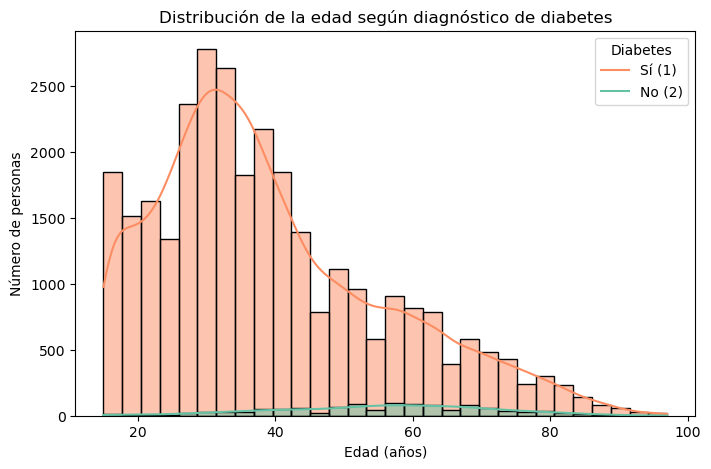

In [79]:
# Comparación gráfica de variables numéricas
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='QS23', hue='QS109', bins=30, kde=True, palette='Set2')
plt.title("Distribución de la edad según diagnóstico de diabetes")
plt.xlabel("Edad (años)")
plt.ylabel("Número de personas")
plt.legend(title="Diabetes", labels=["Sí (1)", "No (2)"])
plt.show()

In [84]:
perfil_num = data.groupby('QS109')[['QS23','QS900','QS901','QS907','QS905S','QS905D']]
perfil_num = perfil_num.agg(['mean','median','std','min','max']).round(3)
display(perfil_num)

QS23                              QS900                               \
         mean median     std   min   max    mean median      std   min    max   
QS109                                                                           
1.0    55.651   57.0  15.554  15.0  92.0  94.297   69.6  147.865  38.3  999.9   
2.0    39.278   36.0  16.721  15.0  97.0  78.409   65.5  104.635  24.5  999.9   

       ...   QS905S                              QS905D                       \
       ...     mean median     std   min    max    mean median     std   min   
QS109  ...                                                                     
1.0    ...  133.696  121.0  91.992  75.0  999.0  85.990   75.5  95.379  42.0   
2.0    ...  121.069  113.0  75.446  60.0  999.0  80.024   73.0  77.656  40.0   

              
         max  
QS109         
1.0    999.0  
2.0    999.0  

[2 rows x 30 columns]

### 3.6 Hallazgos

#### Hallazgos del Paso 3: Descriptive analysis

##### 1. Distribución general del dataset
- El dataset contiene **31459 registros y 29 variables**.
- Las variables abarcan información demográfica (edad, sexo), clínica (peso, talla, perímetro abdominal, presión arterial, hipertensión) y de estilo de vida/dieta (tabaco, alcohol, frutas, verduras, jugos).
- La variable objetivo es QS109 (diagnóstico de diabetes o azúcar alta).


##### 2. Variables principales
- **Sexo**: Distribución relativamente equilibrada entre hombres y mujeres. 
- **Hipertensión (QS102)**: Se observa una proporción significativa de personas diagnosticadas, lo cual es un factor de riesgo.  
- **Consumo de tabaco y alcohol**: Predominan respuestas “No consume”, lo que muestra baja prevalencia en la muestra.
- **Edad (QS23)**: el rango va de jóvenes adultos hasta personas mayores. Se concentra más en adultos de mediana edad. 
- **Peso, talla y perímetro abdominal**: Se identifican valores coherentes con el rango esperado, pero también aparecen registros anormales codificados como 999, lo que no representa un valor real. Estos deben tratarse como valores faltantes para no distorsionar los análisis.  
- **Presión arterial**: existen casos con valores elevados, lo que puede asociarse a riesgo cardiovascular.

##### 4. Valores faltantes
- Hay valores nulos en algunas variables, especialmente en preguntas de dieta y consumo.  
- Además, se detectaron valores atípicos artificiales (999) en variables como peso, talla y perímetro abdominal, lo cual refleja errores de captura o registros sin respuesta.
- Estos valores deben ser recodificados como NaN para evitar que afecten estadísticas y modelos.

##### 5. Correlaciones
- Existe correlación positiva entre peso, perímetro abdominal y presión arterial, lo que refleja el efecto de la obesidad sobre la salud cardiovascular.  
- Edad se asocia con mayor prevalencia de hipertensión y diabetes.
- El análisis comparativo sugiere que personas mayores y con mayor perímetro abdominal tienen más probabilidad de diagnóstico positivo de diabetes.

##### 6. Perfil comparativo: con diabetes vs sin diabetes
- Con diagnóstico de diabetes: tienden a ser de mayor edad, con valores más altos en perímetro abdominal y mayor prevalencia de hipertensión.
- Sin diagnóstico: suelen ser más jóvenes, con menor perímetro abdominal y menos casos de hipertensión.


# 📌 Fase 3. Data Preparation

## 🧹 4. Data Cleaning

#### 4.1 Selección inicial de variables claves

Queremos construir un modelo que prediga si una persona puede tener diabetes (1) o no (0) sin usar exámenes de laboratorio o mediciones de sangre. Por ello, conservaremos factores como datos demográficos, hábitos de vida, alimentación, mediciones antropométricas, presión arterial y antecedentes relevantes de salud.

🔴 **Variables candidatas a eliminar:**
Estas no aportan a la predicción de diabetes porque son identificadores, redundantes o menos relevantes en el foco de salud metabólica.  

- **QS200** → En los  últimos 12 meses ha fumado cigarrillos.
- **QS201** → En los últimos 30 días ha fumado cigarrillos.  
- **QS210** → En los últimos 30 días ha consumido bebidas alcohólicas.  
- **QS212A** → Tomó cerveza  
- **QS212G** → Tomó Whisky/pisco /ron  
- **QS212O** → Tomó otro 
- **QS214C** → Cantidad de tajadas o racimos de fruta que comió.
- **QS218C** → Cantidad porciones ensalada frutas.  
- **QS220CV** → Cantidad porciones ensalada verduras.  
- **QS220CC** → Cantidad cucharadas.  
- **QS903S** → Primera medición presión arterial sistólica.  
- **QS905S** → Segunda medición presión arterial sistólica).  
- **QS905D** → Segunda medición presión arterial diastólica.  
- **QS110U** → Unidad de tiempo en que le diagnosticaron Diabetes o azúcar alta.  
- **QS111** → Ha comprado medicamentos para controlar la diabetes o azúcar alta.  

---

🟢 **Variables candidatas a conservar:**
Estas sí son relevantes porque se relacionan directamente con factores de riesgo y diagnóstico de diabetes:  

📊 **Datos demográficos** 
- **QS23** → Edad del entrevistado (años cumplidos).  
- **QSSEXO** → Sexo del entrevistado.  

---

🚬🍷 **Hábitos y estilo de vida**  
- **QS202** → Fuma diariamente.  
- **QS203C** → Edad que empezó a fumar diariamente.  
- **QS205C** → Cantidad de cigarrillos diarios que fuma.  
- **QS206** → Ha consumido alguna vez bebidas alcohólicas. 
- **QS207C** → Edad primera vez que tomo bebidas alcohólicas.
- **QS208** → En los últimos 12 meses ha consumido alguna bebida alcohólica.  
- **QS209** → En los últimos 12 meses, tomó bebidas alcohólicas 12 o más días.  
- **QS211C** → Cantidad de veces que tomo en un mes.  
- **QS213C** → Cantidad de días que consumió frutas.  
- **QS219C** → Días que comió ensalada de verduras.  

---

🩺 **Mediciones clínicas**  
- **QS900** → Personas de 15 años a màs de edad - Peso en kilogramos.  
- **QS901** → Personas de 15 años a màs de edad - Talla en centímetros.  
- **QS907** → Perímetro abdominal (cm).  

---

⚕️ **Antecedentes y diagnóstico**  
- **QS102** → ¿Alguna vez un médico u otro profesional de la salud le dijo que tenía hipertensión?  
- **QS304** → Le han diagnosticado Catarata.  
- **QS500** → Actualmente tiene tos con flema.  

---

🎯 **Variable objetivo**  
- **QS109** → Le diagnosticaron diabetes.

In [63]:
# Variables candidatas a conservar
features_keep = ["QS23", "QSSEXO",
    "QS202", "QS203C", "QS205C",
    "QS206", "QS207C", "QS208", "QS209", 
    "QS211C","QS213C", "QS219C","QS900", 
    "QS901", "QS907", "QS102",
    "QS304", "QS500"]

# Variable objetivo
target = ["QS109"]  # Le diagnosticaron diabetes

# Crear nuevo DataFrame solo con estas variables
df_sel = data[features_keep+target]

# Información básica del nuevo dataset
print("df_sel.shape:", df_sel.shape)
print("df_sel.columns:", df_sel.columns.tolist())
df_sel.head(10)

df_sel.shape: (34018, 19)
df_sel.columns: ['QS23', 'QSSEXO', 'QS202', 'QS203C', 'QS205C', 'QS206', 'QS207C', 'QS208', 'QS209', 'QS211C', 'QS213C', 'QS219C', 'QS900', 'QS901', 'QS907', 'QS102', 'QS304', 'QS500', 'QS109']


,QS23,QSSEXO,QS202,QS203C,QS205C,QS206,QS207C,QS208,QS209,QS211C,QS213C,QS219C,QS900,QS901,QS907,QS102,QS304,QS500,QS109
0,38.0,2.0,NaN,NaN,NaN,1.0,17.0,2.0,NaN,NaN,NaN,6.0,70.4,152.5,98.9,2.0,NaN,1.0,2.0
1,17.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,7.0,49.8,160.2,68.4,2.0,NaN,2.0,2.0
2,65.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,7.0,6.0,49.7,136.2,86.3,2.0,2.0,2.0,2.0
3,33.0,1.0,2.0,NaN,NaN,1.0,17.0,1.0,2.0,4.0,7.0,2.0,76.0,158.2,100.4,2.0,NaN,2.0,2.0
4,30.0,1.0,NaN,NaN,NaN,1.0,21.0,2.0,NaN,NaN,5.0,NaN,66.0,159.4,87.2,2.0,NaN,2.0,2.0
5,32.0,2.0,NaN,NaN,NaN,1.0,18.0,1.0,2.0,NaN,7.0,2.0,72.9,157.0,91.7,2.0,NaN,2.0,2.0
6,34.0,2.0,NaN,NaN,NaN,1.0,26.0,2.0,NaN,NaN,3.0,4.0,57.3,153.3,80.2,2.0,NaN,2.0,2.0
7,18.0,2.0,NaN,NaN,NaN,1.0,17.0,1.0,2.0,NaN,3.0,3.0,67.6,151.5,93.2,2.0,NaN,2.0,2.0
8,45.0,1.0,NaN,NaN,NaN,1.0,19.0,1.0,2.0,1.0,2.0,6.0,85.7,171.6,101.1,2.0,NaN,2.0,2.0
9,33.0,2.0,NaN,NaN,NaN,1.0,24.0,1.0,1.0,1.0,7.0,7.0,81.2,158.3,108.1,2.0,NaN,2.0,2.0


In [72]:
#  Revisar duplicados (en todo el registro de estas columnas)
duplicates_count = df_sel.duplicated().sum()
# df_sel = df_sel.drop_duplicates()
duplicates_count

2532

In [73]:
# Revisar valores faltantes
df_sel.isnull().sum()

# Conteo total de valores nulos en el DataFrame
print("Total de valores nulos:", df_sel.isnull().sum().sum())

Total de valores nulos: 63294


In [74]:
#  Porcentaje de valores nulos por columna (más útil para limpieza)
print("\nPorcentaje de nulos por columna:")
print((df_sel.isnull().mean() * 100).round(2))


Porcentaje de nulos por columna:
QS23       7.45
QSSEXO     7.44
QS206      7.50
QS207C    16.15
QS208     15.09
QS209     37.89
QS213C    16.41
QS219C    33.04
QS900      7.55
QS901      7.55
QS907      7.55
QS102      7.46
QS500      7.53
QS109      7.46
dtype: float64


**Observación**  
Como podemos visualizar existen columanas que tienen una gran cantidad de datos nulos, más del 60%, así que estas vamos a tener que imputarlas porque no aportarán en nada a nuestro modelo.

In [75]:
# Eliminamos las columnas que tengan más del 60% de datos vacios
# Calcular porcentaje de nulos por columna
porc_nulos = df_sel.isna().mean() * 100

# Seleccionar columnas con más del 60% de nulos
cols_a_eliminar = porc_nulos[porc_nulos > 60].index.tolist()

print("Columnas a eliminar (>60% nulos):", cols_a_eliminar)

# Eliminar esas columnas
df_sel = df_sel.drop(columns=cols_a_eliminar)

# Verificar tamaño final del dataset
print("Dataframe final:", df_sel.shape)

Columnas a eliminar (>60% nulos): []
Dataframe final: (34018, 14)


In [76]:
#  Porcentaje de valores nulos por columna (verificamos)
print("\nPorcentaje de nulos por columna:")
print((df_sel.isnull().mean() * 100).round(2))


Porcentaje de nulos por columna:
QS23       7.45
QSSEXO     7.44
QS206      7.50
QS207C    16.15
QS208     15.09
QS209     37.89
QS213C    16.41
QS219C    33.04
QS900      7.55
QS901      7.55
QS907      7.55
QS102      7.46
QS500      7.53
QS109      7.46
dtype: float64


In [82]:
# Eliminar filas con QS109 nulo
df_limpio = df_sel.dropna(subset=["QS109"])

# Eliminar filas con QS207C nulo
df_limpio = df_limpio.dropna(subset=["QS207C"])

# Eliminar filas con QS500 nulo
df_limpio = df_limpio.dropna(subset=["QS500"])

# Eliminar filas con QS209 nulo
df_limpio = df_limpio.dropna(subset=["QS209"])

#  Porcentaje de valores nulos por columna (verificamos)
print("\nPorcentaje de nulos por columna:")
print((df_limpio.isnull().mean() * 100).round(2))

# Verificar tamaño del dataset
print("Dataframe final:", df_limpio.shape)


Porcentaje de nulos por columna:
QS23       0.00
QSSEXO     0.00
QS206      0.00
QS207C     0.00
QS208      0.00
QS209      0.00
QS213C     9.09
QS219C    25.39
QS900      0.03
QS901      0.03
QS907      0.02
QS102      0.00
QS500      0.00
QS109      0.00
dtype: float64
Dataframe final: (20979, 14)


In [83]:
# Reemplazamos los NA por el promedio
cols_promedio = ["QS213C", "QS900", "QS901", "QS907", "QS219C"]

for col in cols_promedio:
    df_limpio[col] = pd.to_numeric(df_limpio[col], errors="coerce")
    df_limpio[col] = df_limpio[col].fillna(df_limpio[col].mean())

#  Porcentaje de valores nulos por columna (verificamos)
print("\nPorcentaje de nulos por columna:")
print((df_limpio.isnull().mean() * 100).round(2))


Porcentaje de nulos por columna:
QS23      0.0
QSSEXO    0.0
QS206     0.0
QS207C    0.0
QS208     0.0
QS209     0.0
QS213C    0.0
QS219C    0.0
QS900     0.0
QS901     0.0
QS907     0.0
QS102     0.0
QS500     0.0
QS109     0.0
dtype: float64


In [84]:
# Verificamos si hay datos vacios
print("¿Hay nulos en el dataset?:", df_limpio.isnull().values.any())

¿Hay nulos en el dataset?: False


In [88]:
df_limpio.head(10)

,QS23,QSSEXO,QS206,QS207C,QS208,QS209,QS213C,QS219C,QS900,QS901,QS907,QS102,QS500,QS109
3,33.0,1.0,1.0,17.0,1.0,2.0,7.0,2.0,76.0,158.2,100.4,2.0,2.0,2.0
5,32.0,2.0,1.0,18.0,1.0,2.0,7.0,2.0,72.9,157.0,91.7,2.0,2.0,2.0
7,18.0,2.0,1.0,17.0,1.0,2.0,3.0,3.0,67.6,151.5,93.2,2.0,2.0,2.0
8,45.0,1.0,1.0,19.0,1.0,2.0,2.0,6.0,85.7,171.6,101.1,2.0,2.0,2.0
9,33.0,2.0,1.0,24.0,1.0,1.0,7.0,7.0,81.2,158.3,108.1,2.0,2.0,2.0
10,36.0,2.0,1.0,17.0,1.0,2.0,7.0,7.0,51.3,156.1,77.7,1.0,2.0,2.0
11,36.0,2.0,1.0,19.0,1.0,2.0,1.0,7.0,56.8,155.7,91.2,2.0,1.0,2.0
13,19.0,1.0,1.0,16.0,1.0,1.0,7.0,3.0,59.5,167.7,75.6,2.0,2.0,2.0
20,27.0,2.0,1.0,18.0,1.0,1.0,3.0,4.0,62.3,154.0,77.0,2.0,2.0,2.0
23,32.0,2.0,1.0,20.0,1.0,2.0,7.0,3.0,55.7,146.1,76.2,2.0,2.0,2.0


In [89]:
# Verificar tamaño final del dataset
print("Dataframe final:", df_limpio.shape)

Dataframe final: (20979, 14)


**Observación**
Ahora vamos a eliminar los registros que tengan valor **8 = "No lo sé"** en **QS208, QS209, QS102**, porque solo generan ruido.

In [92]:
# Eliminar registros donde QS208, QS209 o QS102 tengan el valor 8
df_limpio = df_limpio[~df_limpio[["QS208", "QS209", "QS102"]].isin([8]).any(axis=1)]

# Verificar tamaño final
print("Shape después de eliminar registros con '8':", df_limpio.shape)

Shape después de eliminar registros con '8': (20958, 14)


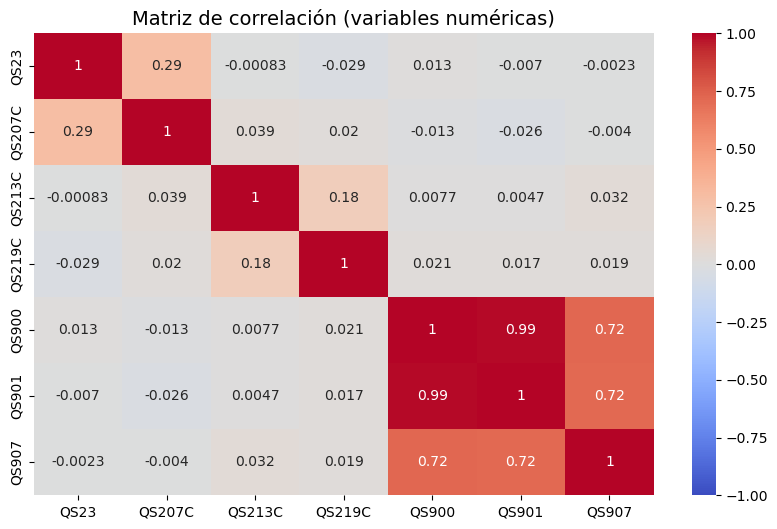

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
cols_num = ["QS23", "QS207C", "QS213C", "QS219C", "QS900", "QS901", "QS907"]

# Calcular matriz de correlación
corr = df_limpio[cols_num].corr()

# Graficar heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Matriz de correlación (variables numéricas)", fontsize=14)
plt.show()

In [100]:
corr_target = df_limpio[cols_num + ["QS109"]].corr()["QS109"].sort_values(ascending=False)
print(corr_target)

QS109     1.000000
QS901    -0.011612
QS213C   -0.011698
QS907    -0.014448
QS900    -0.017780
QS219C   -0.021480
QS207C   -0.029994
QS23     -0.126270
Name: QS109, dtype: float64


##### 🧹 Y listo ya tenemos nuestra data limpia!!!!

## 🧹 5. Data transformation

Luego de limpiar nuestra data, vamos a prodecer a transformarla. En nuestro caso ya no es necesario convertir los datos categoricos puesto que ya vienen en formato numerico. Solo escalaremos las variables numericas continuas que tenemos

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Variables numéricas continuas a escalar
cols_num = [
    "QS23",    # Edad
    "QS900",   # Peso
    "QS901",   # Talla
    "QS903S",  # Presión sistólica
    "QS903D",  # Presión diastólica
    "QS905S",  # 2da toma sistólica
    "QS905D",  # 2da toma diastólica
    "QS907",   # Perímetro abdominal
    "QS209",   # Nº tragos una ocasión
    "QS213C",  # Frutas
    "QS214C",  # Verduras
    "QS219C",  # Bebidas azucaradas
    # "IMC" si ya lo calculaste
]

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar solo las columnas numéricas
df_filtrado[cols_num] = scaler.fit_transform(df_filtrado[cols_num])

# Verificar resultados
print(df_filtrado[cols_num].describe().round(2))

           QS23     QS900     QS901    QS903S    QS903D    QS905S    QS905D  \
count  12662.00  12662.00  12662.00  12662.00  12662.00  12662.00  12662.00   
mean       0.00     -0.00     -0.00     -0.00      0.00      0.00     -0.00   
std        1.00      1.00      1.00      1.00      1.00      1.00      1.00   
min       -1.63     -0.44     -0.40     -0.64     -0.52     -0.62     -0.51   
25%       -0.72     -0.21     -0.18     -0.23     -0.18     -0.23     -0.17   
50%       -0.16     -0.13     -0.12     -0.11     -0.09     -0.10     -0.09   
75%        0.54     -0.04     -0.05      0.04     -0.01      0.03     -0.01   
max        4.12      8.33      8.39     11.01     11.18     11.03     11.18   

          QS907     QS209    QS213C    QS214C    QS219C  
count  12662.00  12662.00  12662.00  12662.00  12662.00  
mean       0.00     -0.00      0.00      0.00     -0.00  
std        1.00      1.00      1.00      1.00      1.00  
min       -0.39     -1.87     -1.63     -0.85     -1.15 

In [55]:
# Primeras 10 filas
df_filtrado.head(30)

,QS23,QSSEXO,QS200,QS206,QS207C,QS208,QS209,QS210,QS213C,QS214C,...,QS900,QS901,QS903S,QS903D,QS905S,QS905D,QS907,QS102,QS107,QS109
3,-0.369266,1,1,1,17,0.0,0.449511,1,1.137650,0.035780,...,-0.061130,-0.119722,-0.011497,0.079543,-0.053248,0.064515,-0.101542,2,1,2
5,-0.439411,2,2,1,18,0.0,0.449511,2,1.137650,-0.846497,...,-0.089296,-0.131857,0.051436,0.067349,0.047364,0.052330,-0.163377,2,2,2
7,-1.421439,2,2,1,17,0.0,0.449511,2,-0.707479,-0.846497,...,-0.137451,-0.187479,-0.238058,-0.091184,-0.179013,-0.093884,-0.152716,2,2,2
8,0.472472,1,2,1,19,0.0,0.449511,1,-1.168761,0.918058,...,0.027003,0.015793,0.114370,0.067349,0.147975,0.064515,-0.096567,2,2,2
9,-0.369266,2,2,1,24,0.0,-1.867960,1,1.137650,0.035780,...,-0.013883,-0.118710,-0.187711,-0.091184,-0.179013,-0.081700,-0.046815,2,1,2
10,-0.158831,2,2,1,17,0.0,0.449511,1,1.137650,-0.846497,...,-0.285551,-0.140959,0.277997,0.201491,0.160552,0.137622,-0.262881,1,1,2
13,-1.351294,1,2,1,16,0.0,-1.867960,1,1.137650,-0.846497,...,-0.211047,-0.023648,0.227650,0.030764,0.173128,0.040146,-0.277807,2,2,2
20,-0.790135,2,2,1,18,0.0,-1.867960,1,-0.707479,0.035780,...,-0.185606,-0.162196,-0.162537,-0.213132,-0.128707,-0.227914,-0.267856,2,2,2
23,-0.439411,2,2,1,20,0.0,0.449511,1,1.137650,-0.846497,...,-0.245573,-0.242089,-0.124777,-0.213132,-0.204165,-0.203545,-0.273542,2,1,2
25,1.664935,1,2,1,20,0.0,0.449511,2,1.137650,-0.846497,...,0.082427,-0.016569,-0.099604,-0.091184,-0.116130,-0.081700,-0.022650,2,2,2


In [58]:
# Calcular correlaciones (solo variables numéricas)
corr = df_filtrado.corr()

# Mostrar las correlaciones con la variable objetivo QS109
print(corr["QS109"].sort_values(ascending=False))

QS109     1.000000
QS102     0.166028
QS107     0.153441
QS214C    0.010338
QS209    -0.000931
QS901    -0.005910
QSSEXO   -0.006412
QS903D   -0.007127
QS905D   -0.007225
QS213C   -0.007509
QS907    -0.008501
QS900    -0.012784
QS905S   -0.019830
QS210    -0.020021
QS903S   -0.020901
QS219C   -0.021690
QS200    -0.026764
QS207C   -0.047808
QS23     -0.167969
QS206          NaN
QS208          NaN
Name: QS109, dtype: float64


Interpretación:
QS109 = 1.00
➝ Es la variable objetivo consigo misma, por eso la correlación es perfecta (=1).

Mayor correlación positiva

QS102 (0.166) → Haber sido diagnosticado con hipertensión tiene relación positiva con la diabetes (personas hipertensas tienden a tener más probabilidad de diabetes).

QS107 (0.153) → Haber sido diagnosticado con glucosa alta también está relacionado con diabetes, lo cual tiene mucho sentido clínico.
👉 Aunque son valores moderados (0.15–0.16), en datos de salud suelen ser importantes.

Correlaciones casi nulas (0.01 a -0.02)
Variables como QS214C (verduras), QS209 (tragos en una ocasión), QS901 (talla), QS903D/S (presión diastólica/sistólica), QS900 (peso) tienen correlaciones muy cercanas a 0.
👉 Esto significa que no muestran una relación lineal fuerte con la diabetes en tu dataset. Pero ojo: podrían influir en un modelo no lineal.

Correlación negativa leve

QS23 (-0.168) → Edad: sorprendentemente, aparece con correlación negativa. Puede deberse a cómo está distribuida tu muestra (ej: más casos de diabetes en adultos de mediana edad que en los más mayores). Vale la pena explorarlo con gráficas.

QS207C (-0.048) → Frecuencia de consumo de alcohol muestra una leve correlación negativa.

El resto (QS200 fumar, QS219C bebidas azucaradas, etc.) tienen correlaciones negativas muy pequeñas, casi despreciables.

NaN en QS206 y QS208
Estas variables probablemente no tenían suficiente variación (ejemplo: si quedaron codificadas como categóricas o con muchos vacíos al momento de calcular correlación). Conviene revisar sus tipos de datos.